# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/home-credit-default-risk/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/home-credit-default-risk/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#1
"""
Your code here
"""

#如果我們今天有一些連續性的數值，可以使用cut&qcut進行離散化 cut函数是利用數值區間將數值分類，qcut則是用分位數。
#https://medium.com/@morris_tai/pandas%E7%9A%84cut-qcut%E5%87%BD%E6%95%B8-93c244e34cfc
#bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])

#cut_rule = pd.IntervalIndex.from_tuples([(0,0), (1,2), (3,5),(5,1000)])

cut_rule = [0, 0.1, 2, 5, 1000] #解答的切法：cut_rule = [-np.inf, 0, 2, 5, np.inf]

labels = ["0個小孩", "1-2個小孩", "3-5個小孩", "超過5個小孩"]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, labels=labels, include_lowest=True)

app_train['CNT_CHILDREN_GROUP'].value_counts()

0個小孩      215371
1-2個小孩     87868
3-5個小孩      4230
超過5個小孩        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [5]:
#2-1 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL

#app_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean()
#app_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].hist()

#grp = 
#grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df = app_train.groupby(["CNT_CHILDREN_GROUP", "TARGET"])['AMT_INCOME_TOTAL']
print(grouped_df.mean())
#app_train.groupby(['CNT_CHILDREN_GROUP'])['TARGET'].mean()


CNT_CHILDREN_GROUP  TARGET
0個小孩                0         166747.010980
                    1         160804.210548
1-2個小孩              0         174590.584401
                    1         176115.362720
3-5個小孩              0         175053.742913
                    1         160677.385714
超過5個小孩              0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64


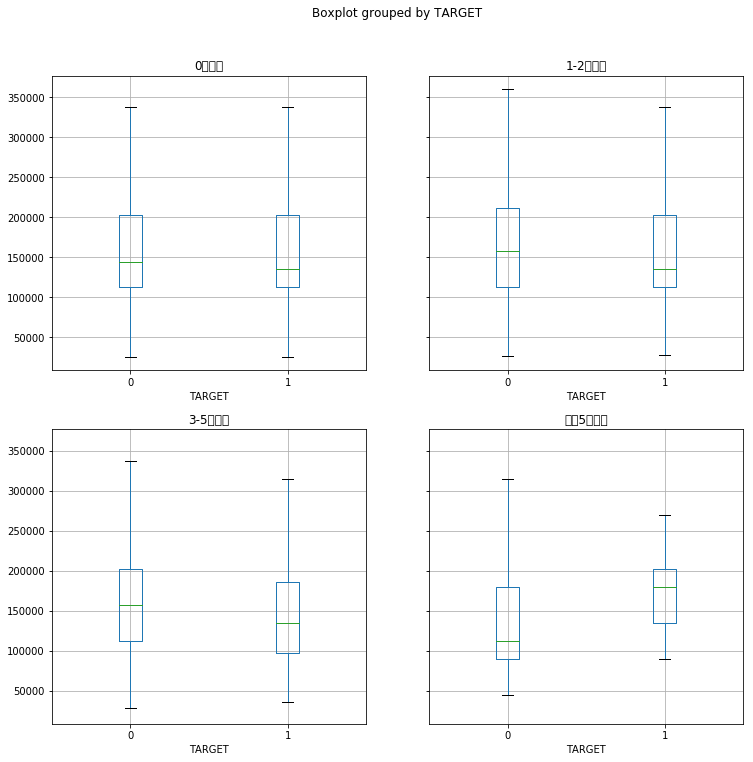

In [66]:
#2-2 並繪製 baxplot
"""
plt_column = 
plt_by = 

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))

plt.suptitle('')
"""

#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
#data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]
#bp = ax.boxplot(data_to_plot)

#畫TARGET = 0的圖
"""
data_target0 = app_train[app_train["TARGET"] == 0]

data0 = [ data_target0[data_target0["CNT_CHILDREN_GROUP"] == "0個小孩"].AMT_INCOME_TOTAL , data_target0[data_target0["CNT_CHILDREN_GROUP"] == "1-2個小孩"].AMT_INCOME_TOTAL, data_target0[data_target0["CNT_CHILDREN_GROUP"] == "3-5個小孩"].AMT_INCOME_TOTAL ,  data_target0[data_target0["CNT_CHILDREN_GROUP"] == "超過5個小孩"].AMT_INCOME_TOTAL ]

fig1, ax1 = plt.subplots()


ax1.boxplot(data0)
## Custom x-axis labels
ax1.set_xticklabels(['0', '1-2', '3-5', 'Over 5'])


#畫TARGET = 1的圖
data_target1 = app_train[app_train["TARGET"] == 1]
data1 = [ data_target1[data_target1["CNT_CHILDREN_GROUP"] == "0個小孩"].AMT_INCOME_TOTAL , data_target1[data_target1["CNT_CHILDREN_GROUP"] == "1-2個小孩"].AMT_INCOME_TOTAL, data_target1[data_target1["CNT_CHILDREN_GROUP"] == "3-5個小孩"].AMT_INCOME_TOTAL ,  data_target1[data_target1["CNT_CHILDREN_GROUP"] == "超過5個小孩"].AMT_INCOME_TOTAL ]
fig2, ax2 = plt.subplots()
ax2.boxplot(data1)
ax2.set_xticklabels(['0', '1-2', '3-5', 'Over 5'])

#ax.boxplot(grouped_df.mean())
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'TARGET'

app_train.groupby('CNT_CHILDREN_GROUP').boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))

plt.show()

In [79]:
#3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數
"""
Your code here
"""

def test1(x):
    print(type(x))
    indexes = x.indexes()
    #x = (x - np.mean(x))/np.std(x)
    
    x = pd.Series(stats.zscore(x)).reIndex(indexes)
    
    print("AAA")
    print(type(x))
    print("End")
    
    return x

#app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:test1(x)) #stats.zscore(x)

#app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:pd.DataFrame(stats.zscore(x)))

#遇到：incompatible index of inserted column with frame index

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - np.mean(x))/np.std(x))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136
